In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import keras
from keras import Sequential
from keras.layers import Dense

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

In [5]:
df=pd.read_csv(r'F:\Deep Learning Assignments\Assignment-4\Multiple CSV\7.xor.csv',header=None)

In [6]:
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [7]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype('int')

<Axes: xlabel='0', ylabel='1'>

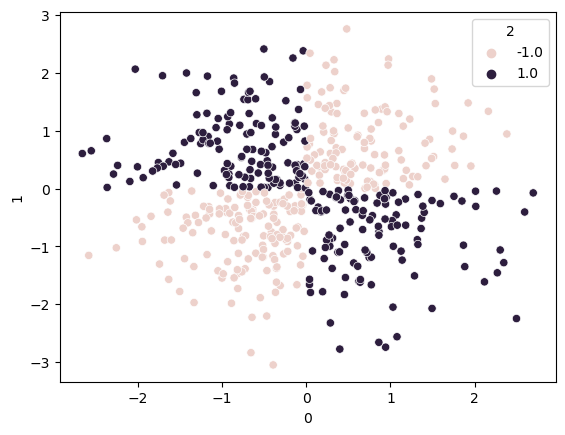

In [8]:
sns.scatterplot(data=df,x=0,y=1,hue=2)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [10]:
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [17]:
model=Sequential()
model.add(Dense(10,activation="tanh",kernel_regularizer=L2(0.009),bias_regularizer=L2(0.003),input_dim=2))
model.add(Dense(5,activation="tanh",kernel_regularizer=L2(0.009),bias_regularizer=L2(0.003)))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.009),bias_regularizer=L2(0.003)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.009),bias_regularizer=L2(0.003)))

In [18]:
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.01),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
81/81 [==============================] - 1s 7ms/step - loss: 0.4120 - accuracy: 0.0494 - val_loss: 0.1135 - val_accuracy: 0.0000e+00
Epoch 2/20
81/81 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.0000e+00 - val_loss: -0.1067 - val_accuracy: 0.0000e+00
Epoch 3/20
81/81 [==============================] - 0s 5ms/step - loss: -0.1603 - accuracy: 0.0123 - val_loss: -0.3028 - val_accuracy: 0.0000e+00
Epoch 4/20
81/81 [==============================] - 0s 5ms/step - loss: -0.3124 - accuracy: 0.0469 - val_loss: -0.4462 - val_accuracy: 0.0000e+00
Epoch 5/20
81/81 [==============================] - 0s 5ms/step - loss: -0.4462 - accuracy: 0.0790 - val_loss: -0.5739 - val_accuracy: 0.0667
Epoch 6/20
81/81 [==============================] - 0s 5ms/step - loss: -0.5606 - accuracy: 0.0815 - val_loss: -0.7101 - val_accuracy: 0.1333
Epoch 7/20
81/81 [==============================] - 0s 5ms/step - loss: -0.6676 - accuracy: 0.1037 - val_loss: -0.8511 - val_accura

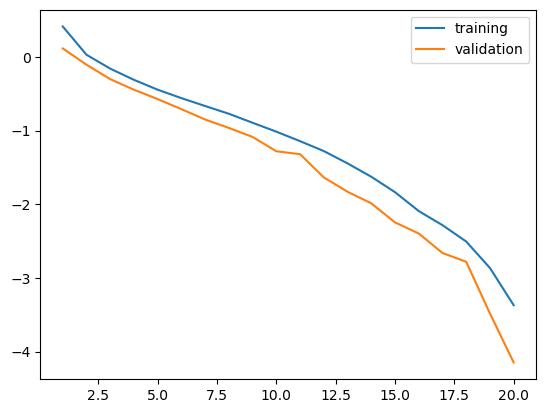

In [19]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 47s 5ms/step


<Axes: >

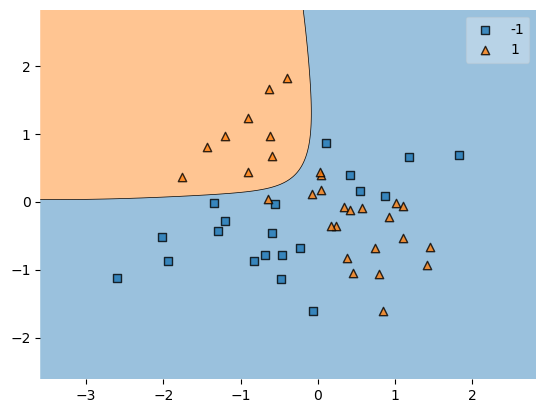

In [20]:
plot_decision_regions(x_testp,y_test.values,clf=model)